In [79]:
import skimage
import rasterio
from rasterio.plot import show
# from rasterio.plot import show_hist
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
# import numpy as np
# import numpy.ma as ma
# import numpy.random
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import pandas as pd
# from pprint import pprint as pp

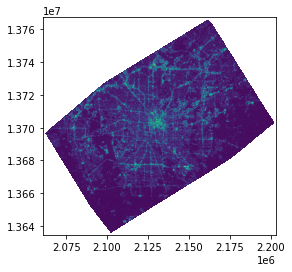

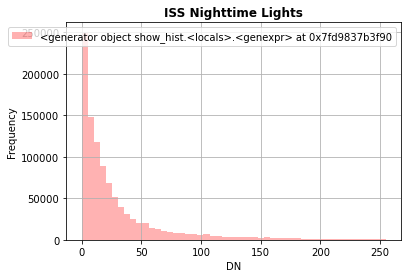

In [80]:
# Read image data using rasterio
# ntl_data = "data/ntl770.img"
# ntl_data = "data/ntl795.img"
ntl_data = "data/ntl632.img"

ntl = rasterio.open(ntl_data)
show(ntl)
show_hist(ntl, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="ISS Nighttime Lights")

In [81]:
image = ma.masked_greater(ntl.read(1), 500).astype('uint8')
print(image.shape)
print(image.dtype)
print(image.min())
print(image.max())

(1350, 1447)
uint8
0
255


In [82]:
glcm = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
print(glcm.shape)
glcm[:, :, 0, 3]

(256, 256, 1, 4)


array([[2.13261809e-04, 5.11366957e-04, 2.69909477e-04, ...,
        0.00000000e+00, 2.56324289e-07, 6.15178294e-06],
       [5.11366957e-04, 7.84659914e-03, 2.94875462e-03, ...,
        0.00000000e+00, 0.00000000e+00, 8.40743669e-05],
       [2.69909477e-04, 2.94875462e-03, 2.43866929e-03, ...,
        0.00000000e+00, 0.00000000e+00, 6.43373966e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.61383721e-06, 4.61383721e-06, 1.79427002e-06],
       [2.56324289e-07, 0.00000000e+00, 0.00000000e+00, ...,
        4.61383721e-06, 5.12648578e-06, 1.53794574e-06],
       [6.15178294e-06, 8.40743669e-05, 6.43373966e-05, ...,
        1.79427002e-06, 1.53794574e-06, 4.81981940e-01]])

In [83]:
texture1 = greycoprops(glcm, 'contrast')
texture2 = greycoprops(glcm, 'homogeneity')
print("Contrast")
print(texture1)
print(texture1.shape)
print("Homogeneity")
print(texture2)
print(texture2.shape)

Contrast
[[591.0163465  986.33299704 834.38828321 854.49501654]]
(1, 4)
Homogeneity
[[0.52979277 0.52592679 0.52736745 0.52677265]]
(1, 4)


# The above works, but it needs to be calculated for all windowed regions of an image.

In [ ]:
print(f"The shape fo the image is {image.shape}")
print(f"The height (i.e., number of rows) is {ntl.height}")

for r in range(ntl.height):
    for c in range(ntl.width):
        if r <

# Below here is for examples...

In [84]:
img = np.array([[0, 0, 1, 1],
                  [0, 0, 1, 1],
                  [0, 2, 2, 2],
                  [2, 2, 3, 3]], dtype=np.uint8)
result = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                      levels=4)
print(result.shape)
result[:, :, 0, 0]
result[:, :, 0, 1]
result[:, :, 0, 2]
result[:, :, 0, 3]

(4, 4, 1, 4)


array([[2, 0, 0, 0],
       [1, 1, 2, 0],
       [0, 0, 2, 1],
       [0, 0, 0, 0]], dtype=uint32)

In [85]:
img.shape

(4, 4)

In [86]:
for x in np.nditer(img):
    print(x)

0
0
1
1
0
0
1
1
0
2
2
2
2
2
3
3
